# Representation of primitive logistic regression

In [34]:
import regression_tools
from linear_regression import  LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import regression_tools
from logistic_regression import LogisticRegression


## preparation


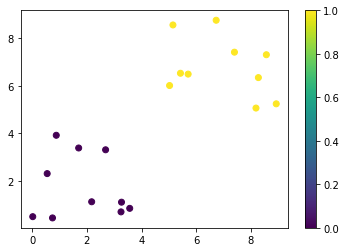

In [35]:
def generate_classification_data(zero_data_size, one_data_size):
    np.random.seed(100)
    X = np.random.rand(zero_data_size+one_data_size, 2)
    X[:zero_data_size] *= 4
    X[-one_data_size:] *= 4
    X[-one_data_size:] += 5

    y_zeros = np.zeros(zero_data_size)[:, np.newaxis]
    y_ones = np.ones(one_data_size)[:, np.newaxis]
    Y = np.vstack((y_zeros, y_ones))
    return X, Y

X, Y = generate_classification_data(10, 10)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.colorbar()

In [41]:
pipe = regression_tools.PipeLine()
pipe.add(regression_tools.n_degree_polynomial(1))
l = LogisticRegression(X, Y, pipe, 0.5)

## learning

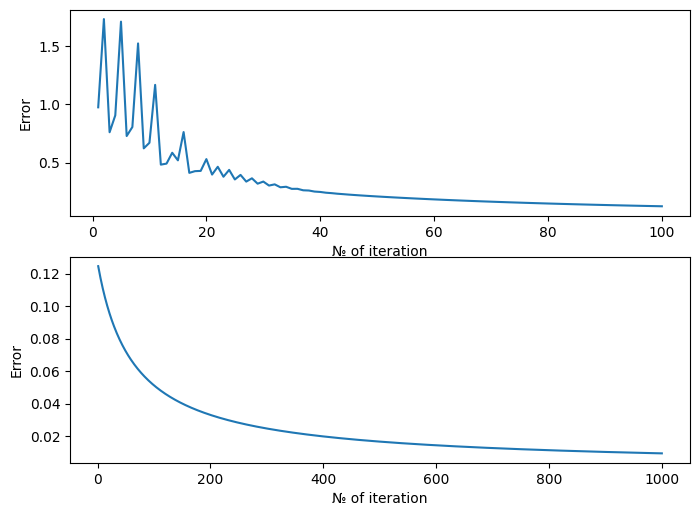

In [42]:
fig, axes = plt.subplots(2, dpi=100, figsize=(8, 6) )
l.learn_and_plot_error(100, 0.5, axis=axes[0])
l.learn_and_plot_error(1000, 1, axis=axes[1])

## result

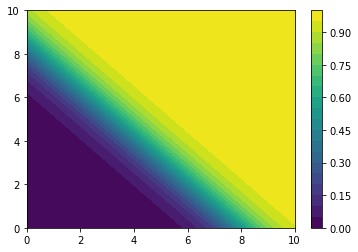

In [43]:
l.plot((0, 10), (0, 10))

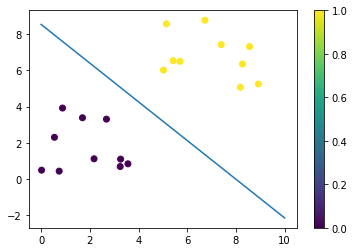

In [45]:
def plot_decision_line(regression, x1_start, x1_end):
    theta = regression.parameters
    X1 = np.array([x1_start, x1_end])
    X2 = -(+ theta[0] + theta[1] * X1) / theta[2]
    plt.scatter(regression.X[:, 0], regression.X[:, 1], c=regression.Y)
    plt.colorbar()
    plt.plot(X1, X2)

plot_decision_line(l, 0, 10)
